<a href="https://colab.research.google.com/github/Gayatri-Surapaneni/Play-store-App-Reviews-EDA/blob/main/Gayatri_Play_store_reviews_EDA_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
columns_with_missing_values = df.columns[df.isnull().any()]
df[columns_with_missing_values].isnull().sum()

Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df[df['Type'].isna()]  #verifying nan column in TYPE

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
df['Type'].fillna('Free', inplace= True)  # replacing NAN with FREE

In [ ]:
df[df['Content Rating'].isna()]   #checking NAN Value

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.dropna(subset=['Content Rating'], inplace= True)

In [ ]:
df.drop(columns=['Android Ver','Current Ver'], axis= 1, inplace= True)

In [ ]:
cater = df.Category.unique()
cater

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
z = df.value_counts('Category')
z

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

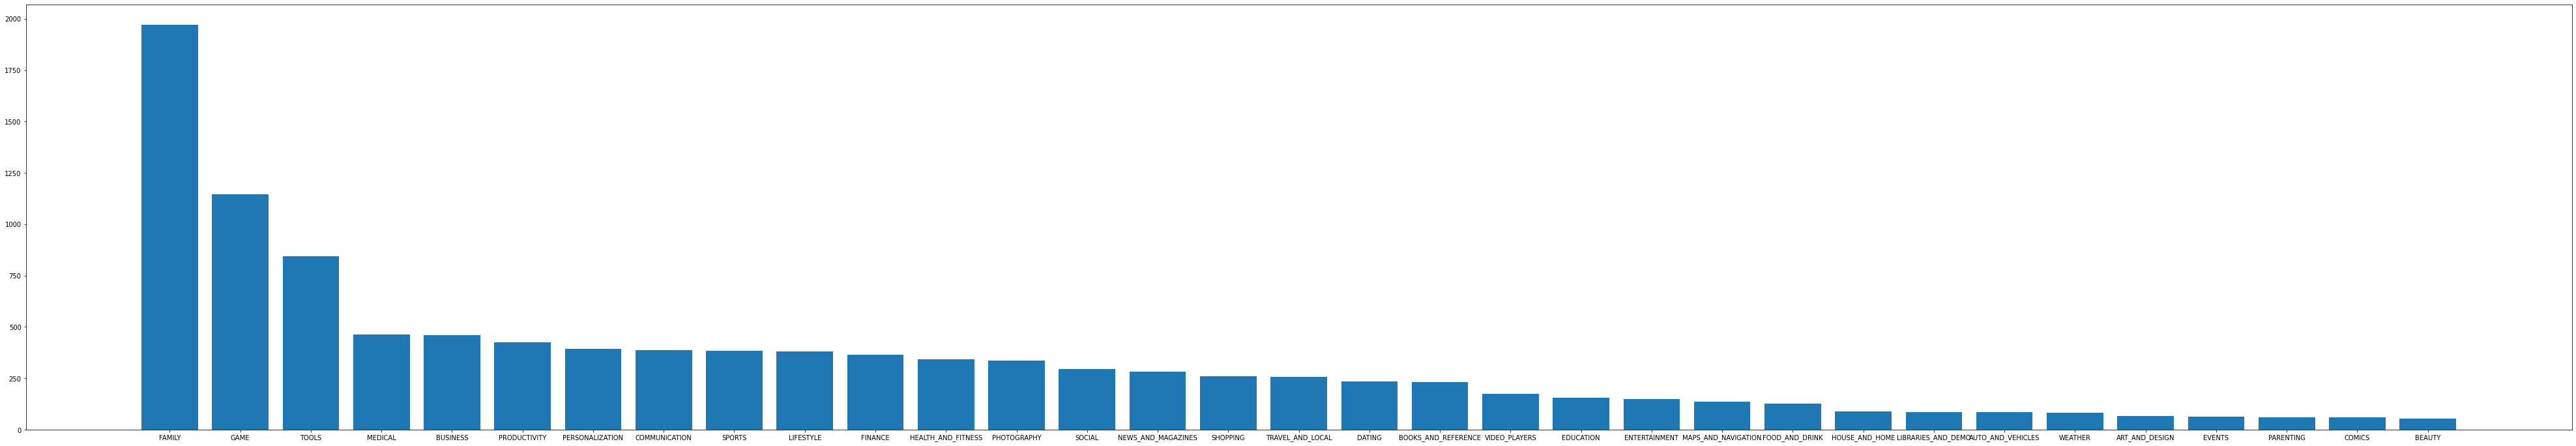

In [ ]:
x = z.index
y = z
plt.figure(figsize=(70,12))
plt.bar(x , y)
plt.show()

2. Rating

In [ ]:
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


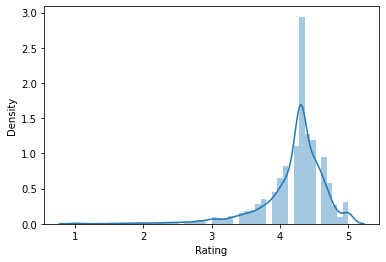

In [ ]:
sns.distplot(df['Rating'])
plt.show()

Removing missing values in Rating Column

In [ ]:
# calculating median value
median_value = df['Rating'].median()

In [ ]:
# replacing the missing values with median value
df['Rating'].fillna(median_value, inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1016.2+ KB


In [ ]:
xc = df.groupby(['Category'])['Rating'].mean().sort_values(ascending = False)
xc

Category
EVENTS                 4.395313
EDUCATION              4.388462
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.335498
PERSONALIZATION        4.328827
PARENTING              4.300000
GAME                   4.286888
BEAUTY                 4.283019
HEALTH_AND_FITNESS     4.280059
SHOPPING               4.263077
SOCIAL                 4.261017
WEATHER                4.248780
SPORTS                 4.236458
PRODUCTIVITY           4.226651
MEDICAL                4.216199
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
AUTO_AND_VEHICLES      4.205882
FAMILY                 4.204564
PHOTOGRAPHY            4.197910
FOOD_AND_DRINK         4.185827
BUSINESS               4.182391
COMMUNICATION          4.180103
NEWS_AND_MAGAZINES     4.161837
COMICS                 4.160000
FINANCE                4.151639
TRAVEL_AND_LOCAL       4.132946
LIFESTYLE              4.131414
ENTERTAINMENT          4.126174
VIDEO_PLAYERS          4.084000
TOOLS                  4.080071

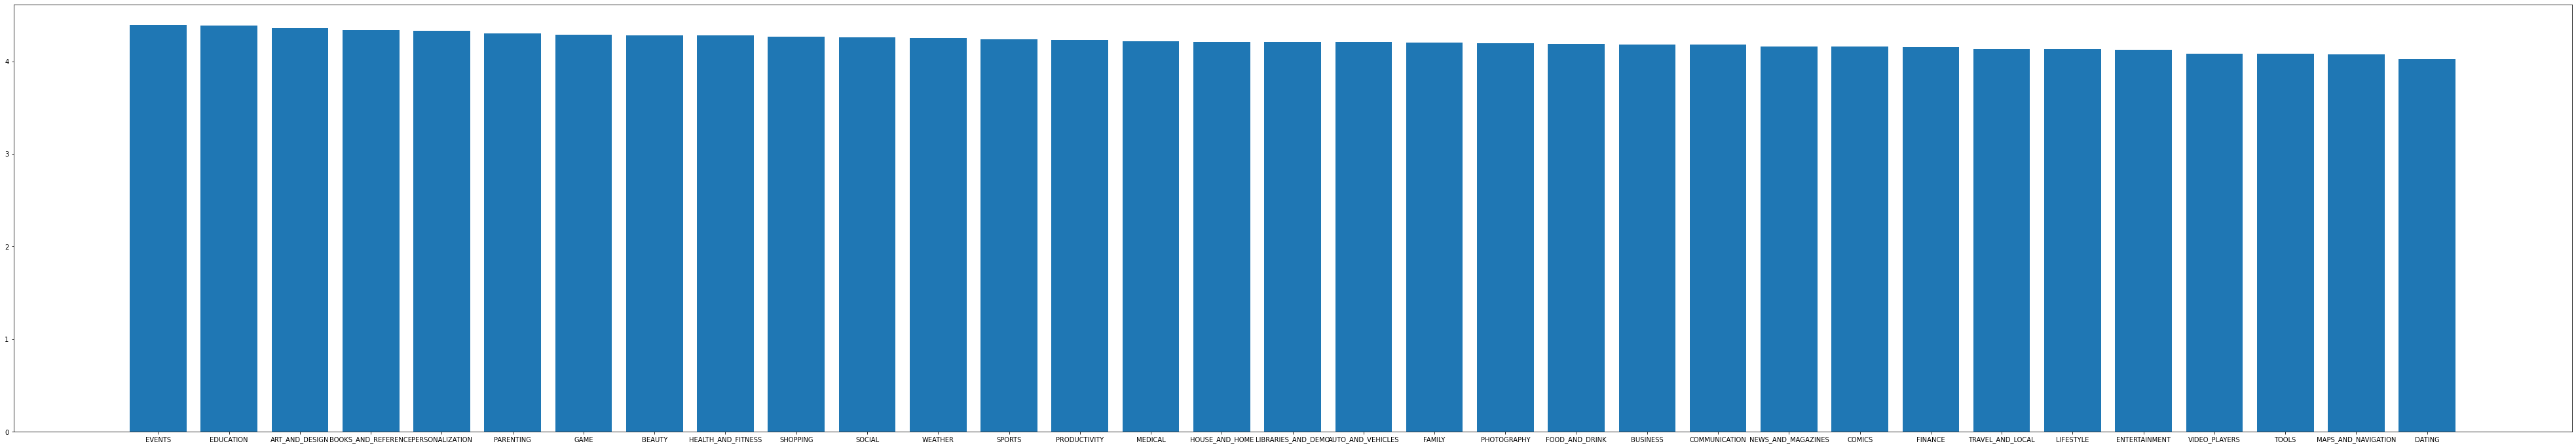

In [ ]:
x = xc.index
y = xc
plt.figure(figsize=(70,12))
plt.bar(x , y)
plt.show()

this is the average of rating by category,  event has the highest average rating by category Events have only 64 Apps .family and game has a lot of Apps causing the low on average rating. 

3. Data from User reviews file

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

In [ ]:
df1.App.unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', ..., 'Hotwire Hotel & Car Rental App',
       'Housing-Real Estate & Property', 'Houzz Interior Design Ideas'],
      dtype=object)

In [ ]:
df1.App.value_counts()

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

In [ ]:
df1.Sentiment. unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

Cleaning the data removing NAN Columns

In [ ]:
df1 = df[df.Sentiment.notnull()]
print(df1)

                                  App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
5               10 Best Foods for You   
...                               ...   
64222  Housing-Real Estate & Property   
64223  Housing-Real Estate & Property   
64226  Housing-Real Estate & Property   
64227  Housing-Real Estate & Property   
64230  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
5                                               Best way  Positive   
...                                                  ...       ...   
64222  Most ads o

In [ ]:
result = df1.groupby('App')['Sentiment'].value_counts()
result

App                               Sentiment
10 Best Foods for You             Positive     162
                                  Neutral       22
                                  Negative      10
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室  Positive      31
                                  Neutral        8
                                              ... 
Hotwire Hotel & Car Rental App    Neutral       11
                                  Negative       6
Housing-Real Estate & Property    Negative      10
                                  Positive       8
                                  Neutral        3
Name: Sentiment, Length: 2376, dtype: int64